# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [6]:
# use normalization to create tables from nested element
pd.json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [7]:
# further populate tables created from nested element
pd.json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')


,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


In [11]:
sample_json_df.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

In [12]:
sample_json_df[['_id','id','project_name', 'country_namecode', 'countrycode', 'countryname','countryshortname','mjtheme_namecode']]

,_id,id,project_name,country_namecode,countrycode,countryname,countryshortname,mjtheme_namecode
0,{'$oid': '52b213b38594d8a2be17c780'},P129828,Ethiopia General Education Quality Improvement...,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,"[{'name': 'Human development', 'code': '8'}, {..."
1,{'$oid': '52b213b38594d8a2be17c781'},P144674,TN: DTF Social Protection Reforms Support,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,"[{'name': 'Economic management', 'code': '1'},..."


In [14]:
pd.json_normalize(json.load((open('data/world_bank_projects_less.json'))),'mjtheme_namecode',['_id','id','project_name', 'country_namecode', 'countrycode', 'countryname','countryshortname'])

,name,code
0,Human development,8
1,,11
2,Economic management,1
3,Social protection and risk management,6


In [15]:
pd.json_normalize(json.load((open('data/world_bank_projects_less.json'))),'mjtheme_namecode',['_id','id','project_name', 'country_namecode', 'countrycode', 'countryname','countryshortname'])

,name,code,_id,id,project_name,country_namecode,countrycode,countryname,countryshortname
0,Human development,8,{'$oid': '52b213b38594d8a2be17c780'},P129828,Ethiopia General Education Quality Improvement...,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia
1,,11,{'$oid': '52b213b38594d8a2be17c780'},P129828,Ethiopia General Education Quality Improvement...,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia
2,Economic management,1,{'$oid': '52b213b38594d8a2be17c781'},P144674,TN: DTF Social Protection Reforms Support,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia
3,Social protection and risk management,6,{'$oid': '52b213b38594d8a2be17c781'},P144674,TN: DTF Social Protection Reforms Support,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [113]:
import re

In [71]:
full_df = pd.read_json('data/world_bank_projects.json')

In [107]:
full_df.head()

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


In [73]:
full_df.shape

(500, 50)

In [74]:
full_df_json_norm =pd.json_normalize(json.load((open('data/world_bank_projects.json'))),'mjtheme_namecode',['_id','id','project_name', 'country_namecode', 'countrycode', 'countryname','countryshortname'])

In [75]:
full_df_json_norm.head(1)

,code,name,_id,id,project_name,country_namecode,countrycode,countryname,countryshortname
0,8,Human development,{'$oid': '52b213b38594d8a2be17c780'},P129828,Ethiopia General Education Quality Improvement...,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia


In [76]:
#Look at data types
full_df_json_norm.info(['countryshortname',''])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              1499 non-null   object
 1   name              1499 non-null   object
 2   _id               1499 non-null   object
 3   id                1499 non-null   object
 4   project_name      1499 non-null   object
 5   country_namecode  1499 non-null   object
 6   countrycode       1499 non-null   object
 7   countryname       1499 non-null   object
 8   countryshortname  1499 non-null   object
dtypes: object(9)
memory usage: 105.5+ KB


In [77]:
#trying to look for country naming inconsistencies
full_df_json_norm[['countrycode','countryshortname']].value_counts().sort_index().index.tolist()

[('1W', 'World'),
 ('3A', 'Africa'),
 ('4E', 'East Asia and Pacific'),
 ('4P', 'Pacific Islands'),
 ('5M', 'Middle East and North Africa'),
 ('7E', 'Europe and Central Asia'),
 ('8S', 'South Asia'),
 ('AF', 'Afghanistan'),
 ('AG', 'Antigua and Barbuda'),
 ('AL', 'Albania'),
 ('AM', 'Armenia'),
 ('AO', 'Angola'),
 ('AR', 'Argentina'),
 ('AZ', 'Azerbaijan'),
 ('BA', 'Bosnia and Herzegovina'),
 ('BD', 'Bangladesh'),
 ('BF', 'Burkina Faso'),
 ('BI', 'Burundi'),
 ('BJ', 'Benin'),
 ('BO', 'Bolivia'),
 ('BR', 'Brazil'),
 ('BT', 'Bhutan'),
 ('BY', 'Belarus'),
 ('CF', 'Central African Republic'),
 ('CG', 'Congo, Republic of'),
 ('CI', "Cote d'Ivoire"),
 ('CL', 'Chile'),
 ('CM', 'Cameroon'),
 ('CN', 'China'),
 ('CO', 'Colombia'),
 ('CR', 'Costa Rica'),
 ('CV', 'Cape Verde'),
 ('DJ', 'Djibouti'),
 ('EC', 'Ecuador'),
 ('EG', 'Egypt, Arab Republic of'),
 ('ET', 'Ethiopia'),
 ('GE', 'Georgia'),
 ('GH', 'Ghana'),
 ('GM', 'Gambia, The'),
 ('GN', 'Guinea'),
 ('GT', 'Guatemala'),
 ('GZ', 'West Bank and 

Finding Top 10 Countries With Most Projects

In [109]:
#shows id is unique
#full_df[['countryshortname','id']].value_counts().values

In [123]:
exclude = ['1W','3A', '4E','4P','5M','7E','8S'] #exclude continents and world
full_df[['countryshortname','id']][~full_df['countrycode'].str.contains(r'\b(?:{})\b'.format('|'.join(exclude)))].groupby(['countryshortname']).size().sort_values(ascending=False)[:10]

countryshortname
Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Morocco               12
Bangladesh            12
Nepal                 12
Mozambique            11
Pakistan               9
dtype: int64

Filling in Empty name Values

In [78]:
#create a lookup for the missing names linked to the codes
name_code_dict = {}

def create_code_name(x,y):
    if name_code_dict.get(x,0):
        pass
    else:
        #print(x)
        #print(y)
        name_code_dict[x] = y


In [79]:
#apply the the function above to create a fill list
full_df_json_norm.apply(lambda x: create_code_name(x['code'],x['name']), axis=1)
name_code_dict

{'8': 'Human development',
 '11': 'Environment and natural resources management',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [80]:
#function to fill in missing
def fill_in_name(x,y):
    if y:
        pass
    else:
        y = name_code_dict[x]
    return y

In [85]:
full_df_json_norm['name'] = full_df_json_norm.apply(lambda x: fill_in_name(x['code'], x['name']),axis=1)

In [89]:
#Name field completely filled now
full_df_json_norm.head()
#full_df_json_norm.tail(20)

,code,name,_id,id,project_name,country_namecode,countrycode,countryname,countryshortname
0,8,Human development,{'$oid': '52b213b38594d8a2be17c780'},P129828,Ethiopia General Education Quality Improvement...,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia
1,11,Environment and natural resources management,{'$oid': '52b213b38594d8a2be17c780'},P129828,Ethiopia General Education Quality Improvement...,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia
2,1,Economic management,{'$oid': '52b213b38594d8a2be17c781'},P144674,TN: DTF Social Protection Reforms Support,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia
3,6,Social protection and risk management,{'$oid': '52b213b38594d8a2be17c781'},P144674,TN: DTF Social Protection Reforms Support,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia
4,5,Trade and integration,{'$oid': '52b213b38594d8a2be17c782'},P145310,Tuvalu Aviation Investment Project - Additiona...,Tuvalu!$!TV,TV,Tuvalu,Tuvalu


Top Ten Themes

In [95]:
#Top Ten Themes
full_df_json_norm[['name','code']].groupby(['name','code']).size().sort_values(ascending=False)[:10]

name                                          code
Environment and natural resources management  11      250
Rural development                             10      216
Human development                             8       210
Public sector governance                      2       199
Social protection and risk management         6       168
Financial and private sector development      4       146
Social dev/gender/inclusion                   7       130
Trade and integration                         5        77
Urban development                             9        50
Economic management                           1        38
dtype: int64

In [96]:
import matplotlib.pyplot as plt

%matplotlib inline

<AxesSubplot:ylabel='name'>

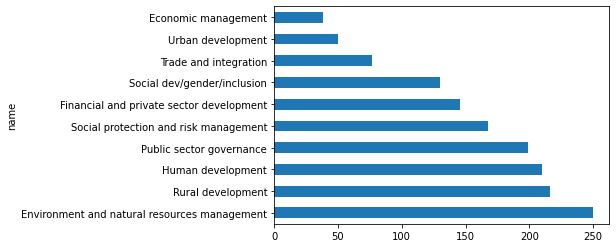

In [102]:
#Top Ten Themes
full_df_json_norm[['name']].groupby(['name']).size().sort_values(ascending=False)[:10].plot(kind='barh')